In [1]:
from pfs.lam.detAnalysis import *
from pfs.lam.imageAnalysis import *

from pfs.lam.fileHandling import *
import glob

In [2]:
#%matplotlib widget

import matplotlib.pyplot as plt
#plt.style.use('dark_background')
from matplotlib import style
style.use('ggplot')

In [3]:
import lsst.daf.persistence as dafPersist

In [4]:
def plotOnePeak(image, cx,cy, roi_size=30, doBck=False, nRows=5, vmin=None, vmax=None, verbose=False):
    indx = cy
    indy = cx

    if type(image) is str:
        hdulist = fits.open(image, "readonly")
        image = hdulist[1].data
    

    data = np.copy(image)
    outer_data, inner_data = getRois(data, cx, cy, inner_size=5, outer_size=roi_size, doBck=doBck, nRows=nRows)    
    m, s = np.mean(outer_data), np.std(outer_data)
    if verbose:
        print(f"mean: {m}")
        print(f"std: {s}")
    vmin = vmin if vmin is not None else m-s
    vmax = vmax if vmax is not None else m+s
    
    fig, (ax, ax2) = plt.subplots(ncols=2, constrained_layout=True)
    #ax = plt.subplot(111)
    im = ax.imshow(outer_data,interpolation="none", origin="lower", vmin=vmin, vmax=vmax)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    m = np.log10(np.where(outer_data>0, outer_data, -1))

    #ax2 = plt.subplot(121)
    im = ax2.imshow(m,interpolation="none", origin="lower",cmap="gray")
    
    plt.colorbar(im, cax=cax)
    plt.show()

In [5]:
def plotRoiPeak(image, peak_list, roi_size=20, raw=False, scale=True, verbose=False, savePlotFile=False):
    if type(image) is str:     
        hdulist = fits.open(image, "readonly")
        image = hdulist[1].data
    
    plist = pd.read_csv(peak_list) if type(peak_list) is str else peak_list

#    plist = plist.sort_values(["X","Y"], ascending=[True,False])
    
    nbfiber = len(plist.fiber.unique())
    nbwave = len(plist.wavelength.unique())
    # have a list of fiber from 0 to nbfiber
    listwavestoplot = pd.DataFrame(plist.wavelength.unique(), columns=["wavelength"])

    listfiberstoplot = pd.DataFrame(plist.fiber.unique(), columns=["fiber"])
    
    print("#Fiber= %d and #wavelength= %d"%(nbfiber, nbwave))
    f, axarr = plt.subplots(nbwave, nbfiber,  sharex='col', sharey='row',figsize=(12,8))
#    print(axarr.shape)
    vmin=None
    vmax=None
    
    for (wave, fiber), group in plist.groupby(['wavelength','fiber']):
        k = listwavestoplot[listwavestoplot.wavelength == wave].index.tolist()[0]
        i = listfiberstoplot[listfiberstoplot.fiber == fiber].index.tolist()[0]
        if verbose:
            print(k,i)
            print(f"px {group['px']}    py: {group['py']}")
        #cut_data = image[int(indx-roi_size/2):int(indx+roi_size/2), int(indy-roi_size/2):int(indy+roi_size/2)]
        cut_data = selectRoi(image, group["px"], group["py"], roi_size=roi_size)
        if nbwave == 1 and nbfiber == 1:
            axarr.set_title(f"{str(fiber)}, {str(wave)}")
            axarr.imshow(cut_data,interpolation="none", origin="lower", vmin=vmin, vmax=vmax)
        else:
            #axarr[nbwave -1 -k, nbfiber - i -1].set_title(f"{fiber}, {wave:.2f}")
            #axarr[nbwave -1 -k, nbfiber - i -1].label_outer()
            axarr[nbwave -1 -k, nbfiber - i -1].imshow(cut_data,interpolation="none", origin="lower", vmin=vmin, vmax=vmax)
#            axarr[nbwave -1 -k, nbfiber - i -1].set_ylabel(f"{wave:.2f}")
#            axarr[nbwave -1 -k, nbfiber - i -1].set_xlabel(fiber)
            axarr[nbwave -1 -k, nbfiber - i -1].grid(False)

                
    f.subplots_adjust(hspace=0.5,wspace=0.5)

    for ax, wave in zip(axarr[:,0], listwavestoplot.sort_index(ascending=False).wavelength.values) :
            ax.set_ylabel(f"{wave:.2f}", rotation='horizontal', ha='right', fontsize=20)
#            ax.set_xlabel(ax.get_xlabel(), rotation='vertical', fontsize=20)
            ax.set_yticklabels('')
            ax.set_xticklabels('')
            ax.set_frame_on(False)
    for ax, fiber in zip(axarr[-1,:], listfiberstoplot.sort_index(ascending=False).fiber.values):
#            ax.set_ylabel(ax.get_ylabel(), rotation='horizontal', ha='right', fontsize=20)
            ax.set_xlabel(fiber, rotation='vertical', fontsize=20)
            ax.set_yticklabels('')
            ax.set_xticklabels('')
            ax.set_frame_on(False)

    plt.gcf().set_facecolor('w')
    if doSave:
        fig.patch.set_alpha(0.5)
        plt.savefig(savePlotFile+f"_roi_all.png")
                  
    plt.show()


In [6]:
cluster = True

In [7]:
if cluster :
    imgPath = '/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/'
    dataPath = "/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/"
    drpPath = "/net/SRVSTK20C/drp/cluster"
    repo = "repo"
else:
    imgPath = '/media/fmadec/PfsData/PFS/fmadec/analysis/subaru/sm1/'
    dataPath = imgPath
    drpPath = "/home/fmadec/pfs/subaruData/"    
    repo = "sm1-newfoc-20200721"
    repo = "sm1"

In [8]:
verbose = True

In [9]:
# 
ExpIds = [169]
rerun = "sm1-octob2020" #"sm1-march2020"
cam = "r1"
roi_size = 24
doBck = True

Sources = ["hgar"]

In [10]:
#repo = "drp"
#drpPath = "/home/fmadec/pfs/subaruData/"
arm = cam[0]
sm = int(cam[1])
print(arm, sm)

r 1


In [11]:
SM = "SM1"
site = "Subaru"

In [12]:
#extra = "Imqual_LAM_peaklist_2020July"
extra = ""

In [13]:
files = []
for ExpId in ExpIds :
    csvPath = imgPath+"Exp"+str(ExpId)+"/"+rerun+"_roi"+str(roi_size)+"/doBck"+str(doBck)+"/"+extra
    dataPath = csvPath
#    print(dataPath)

    searchFile = f"{csvPath}Imquality_{cam}_Exp{ExpId}*"
    print(searchFile)
    files.extend(glob.glob(f"{searchFile}"))

if verbose:
    print(*files, sep="\n")

/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/Exp169/sm1-octob2020_roi24/doBckTrue/Imquality_r1_Exp169*
/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/Exp169/sm1-octob2020_roi24/doBckTrue/Imquality_r1_Exp169_1990_20201103T10h22.csv
/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/Exp169/sm1-octob2020_roi24/doBckTrue/Imquality_r1_Exp169_2002_20201103T10h22.csv
/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/Exp169/sm1-octob2020_roi24/doBckTrue/Imquality_r1_Exp169_1980_20201103T10h29.csv
/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/Exp169/sm1-octob2020_roi24/doBckTrue/Imquality_r1_Exp169_2012_20201103T10h29.csv
/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/Exp169/sm1-octob2020_roi24/doBckTrue/Imquality_r1_Exp169_1971_20201103T10h28.csv
/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/Exp169/sm1-octob2020_roi24/doBckTrue/Imquality_r1_Exp169_1983_20201103T10h22.csv
/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/Exp169/sm1-octob2020_roi24/doBckTrue/Imquality_r1_Exp169_2011_20201103T10h22.csv
/net/SR

In [14]:
filelist = files

In [15]:
comment = extra + f"doBck{doBck}"
savePlotFile = imgPath+f"{SM}_{site}_{cam}_ExpIds_{'-'.join(str(x) for x in ExpIds)}_{'-'.join(str(x) for x in Sources)}"
savePlotFile = savePlotFile+f"_{comment}"
print(savePlotFile)
savePlotScatterFile = imgPath+f"{SM}_{site}_{cam}_ExpIds_{'-'.join(str(x) for x in ExpIds)}_{'-'.join(str(x) for x in Sources)}_scatter"
savePlotScatterFile = savePlotScatterFile+f"_{comment}"
print(savePlotScatterFile)
title = f"{SM} {site} {cam} ExpIds {' '.join(str(x) for x in ExpIds)} {' '.join(str(x) for x in Sources)}"
title = title + f"\n{comment}"
print(title)

/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/SM1_Subaru_r1_ExpIds_169_hgar_doBckTrue
/net/SRVSTK20C/drp/fmadec/analysis/subaru/sm1/SM1_Subaru_r1_ExpIds_169_hgar_scatter_doBckTrue
SM1 Subaru r1 ExpIds 169 hgar
doBckTrue


In [16]:
ob = pd.concat([pd.read_csv(filen) for filen in filelist ], ignore_index=True)
#ob = pd.concat(map(pd.read_csv,files)).reset_index().sort_values(by="motor1")


In [17]:
ob["sep_2ndM"]= ob.apply(lambda x: np.mean([x["sep_x2"],x["sep_y2"]]) , axis=1)

In [18]:
ob.element.unique()

array(['Ar'], dtype=object)

In [19]:
ob.wavelength.unique()

array([696.7352, 727.494 , 795.0362, 912.5471, 966.0435])

In [20]:
filelist[0].split('/')[-1]

'Imquality_r1_Exp169_1990_20201103T10h22.csv'

# do some filtering if needed/wanted

In [21]:
df = ob

In [22]:
len(ob[(ob.sep_flag >1) ])

100

In [23]:
df = ob[(ob.sep_flag <1) ]

In [24]:
waves = ob.wavelength.unique()
print(waves)

[696.7352 727.494  795.0362 912.5471 966.0435]


In [25]:
fibers = ob.fiber.unique()
print(fibers)

[  2  63 192 255 339 401 464 525 587 650]


####  Filtering of 
#ExpIds = [2605, 2606] 
#rerun = "sm1-focus-sep2020"
#cam = "r1"
#roi_size = 24
#doBck = True

#Sources = ["argon", "neon"] 

#because of saturation or CR

ind_wave = 8
print(waves[ind_wave])
df = ob[ob.wavelength != waves[ind_wave]]

ind_wave = 11
print(waves[ind_wave])
df = df[df.wavelength != waves[ind_wave]]

df = df[(df.EE5>0.3) & (df.fwhm < 6) ] #=> checked CR 

In [26]:
print(len(ob))
print(len(df))
print(len(ob)-len(df))
print(100*(len(ob)-len(df))/len(ob))

5104
5004
100
1.9592476489028212


In [27]:
df = df[(df.sep_flag <1) ]

In [28]:
doSavePlot = True

In [29]:
pdf = df[(df.EE5<0.860)]
print(len(pdf))

490


In [30]:
pdf = df[(df.fwhm>3.5) | (df.fwhm<2.4)]
print(len(pdf))

22


In [31]:
pdf.set_index(["wavelength", "fiber"])[["fwhm", "brightness", "EE5"]]

fwhm   brightness       EE5
wavelength fiber                                  
727.4940   464     1.997528   231.471704  0.023808
966.0435   2       3.510655  1764.859491  0.800700
           2      16.617537  1068.866394  0.212769
           2       3.520367  1721.374321  0.793358
           2       3.506437  1704.330314  0.792198
           63      3.502807  1838.715801  0.812993
           2       3.519449  1748.989867  0.797368
727.4940   192     2.287533   732.785004  0.073054
966.0435   2       3.522284  1721.506000  0.809540
727.4940   587     2.357612   645.591701  0.353725
966.0435   2       3.503912  1739.666956  0.792652
           63      3.502807  1838.715801  0.812993
727.4940   587     2.357612   645.591701  0.353725
966.0435   2       3.520367  1721.374321  0.793358
           2       3.503912  1739.666956  0.792652
           2       3.506437  1704.330314  0.792198
727.4940   464     1.997528   231.471704  0.023808
           192     2.287533   732.785004  0.073054
966.0435   2       3.522284  1721.506000  0.809540
           2       3.519449  1748.989867  0.797368
           2       3.510655  1764.859491  0.800700
           2      16.617537  1068.866394  0.212769

In [32]:
ind = 0

In [33]:
visitId = int(pdf.visit.iloc[ind])
print(visitId)
print(pdf.wavelength.iloc[ind])
print(pdf.fiber.iloc[ind])
print(pdf.EE5.iloc[ind])
#visitId = 3449 

2002
727.4939999999999
464
0.02380756475031376


In [34]:
print(f"{drpPath}/{repo}/rerun/{rerun}/detrend/")

/net/SRVSTK20C/drp/cluster/repo/rerun/sm1-octob2020/detrend/


In [35]:
butler = dafPersist.Butler(f"{drpPath}/{repo}/rerun/{rerun}/detrend/")
calExp = butler.get("calexp", visit=visitId, arm=arm)

In [36]:
cx = pdf.px.iloc[ind]
cy = pdf.py.iloc[ind]
print(cx,cy)
#imagefile = imgPath+ pdf.file.iloc[ind]
#print(imagefile)

1225.4272984915385 1192.4298214095809


#Fiber= 10 and #wavelength= 5


TypeError: cannot convert the series to <class 'int'>

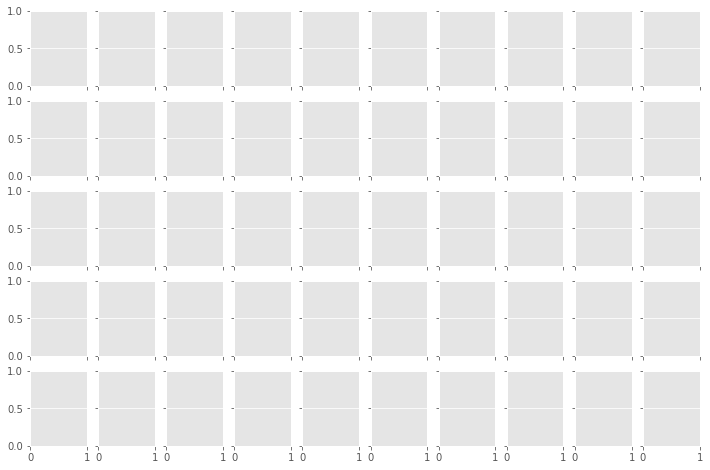

In [37]:
plotRoiPeak(calExp.image.array, df[df.visit == visitId].reset_index(), roi_size=16, verbose=False)

#Fiber= 10 and #wavelength= 5


TypeError: cannot convert the series to <class 'int'>

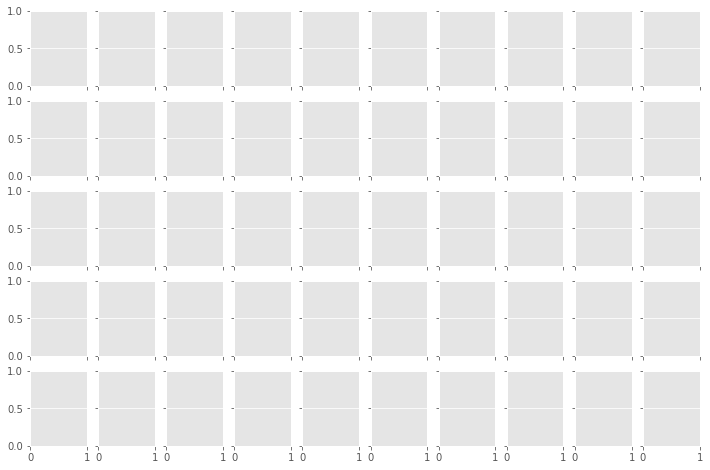

In [39]:
plotRoiPeak(calExp.image.array, df[df.visit == visitId].reset_index(), roi_size=16, verbose=False, scale=True)

In [ ]:
ob.wavelength.unique()

mean: 80.10707092285156
std: 313.4257507324219


/software/drp/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


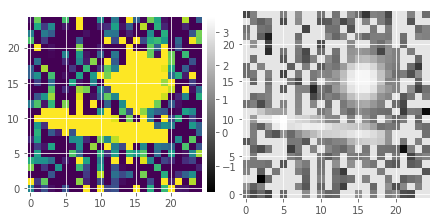

In [38]:

plotOnePeak(calExp.image.array,cx, cy, roi_size=24, vmin=0, vmax= 10, doBck=True, verbose=True)

In [ ]:
getEE(calExp.image.array,cx, cy,doBck=True, roi_size=24)

In [ ]:

for index, row in pdf.iterrows():
    visitId = int(row.visit)
    calExp2 = butler.get("calexp", visit=visitId, arm=arm)
    plotOnePeak(calExp2.image.array,row.px, row.py, roi_size=24, vmin=0, vmax= 10, doBck=True, verbose=True) 